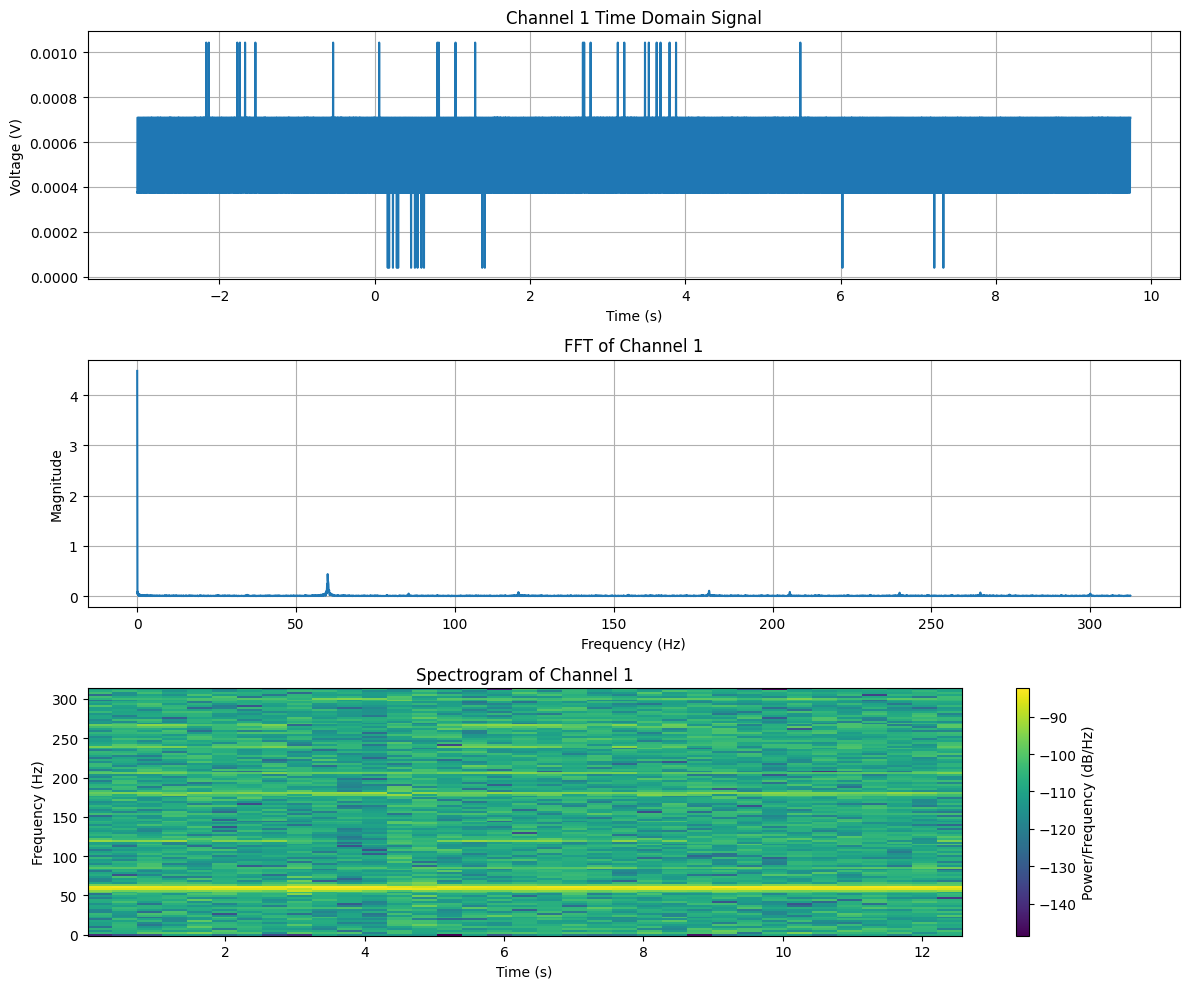

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Read the CSV file, skipping the header comments
data = pd.read_csv('anu.csv', comment='#')

# Extract time and Channel 1 data
time = data['Time (s)'].values
channel1 = data['Channel 1 (V)'].values

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot time domain signal
ax1.plot(time, channel1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('Channel 1 Time Domain Signal')
ax1.grid(True)

# Compute and plot FFT
sample_rate = 1 / np.mean(np.diff(time))  # Calculate sampling rate
n = len(channel1)
freq = np.fft.fftfreq(n, 1/sample_rate)
fft = np.fft.fft(channel1)
ax2.plot(freq[:n//2], np.abs(fft)[:n//2])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('FFT of Channel 1')
ax2.grid(True)

# Compute and plot spectrogram
f, t, Sxx = signal.spectrogram(channel1, fs=sample_rate)
im = ax3.pcolormesh(t, f, 10 * np.log10(Sxx))
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')
ax3.set_title('Spectrogram of Channel 1')
plt.colorbar(im, ax=ax3, label='Power/Frequency (dB/Hz)')

# Adjust layout and display
plt.tight_layout()
plt.show()